In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
# Find the optimal number of clusters using Elbow Method
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

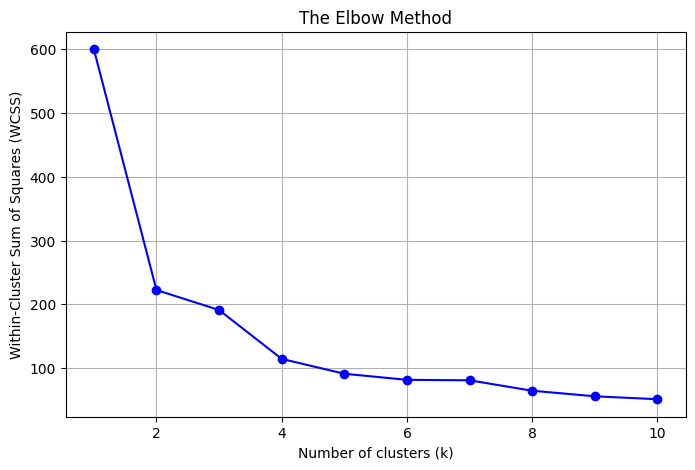

In [9]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

In [6]:
# From elbow plot, suppose we choose k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Show first 5 rows of the result
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


Text(0, 0.5, 'sepal width (cm)')

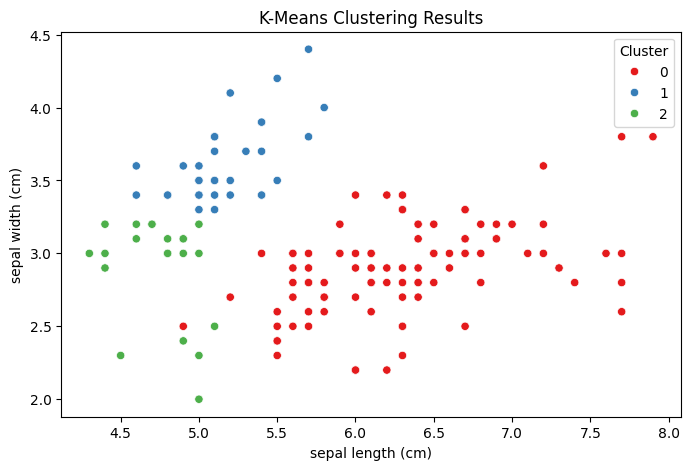

In [7]:
# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[iris.feature_names[0]],
                y=df[iris.feature_names[1]],
                hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clustering Results')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

In [8]:
# Calculate silhouette score
score = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4798814508199817
